# Plot Landsat and Sentinel side by side

In [13]:
import os

import numpy as np
from osgeo import gdal

import scipy.misc

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
sns.set_context('talk')
sns.set_style('whitegrid')

In [14]:
outfigdir = './figures'
dpi = 300

In [7]:
landsat_files = [ \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_band2_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_band3_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_band4_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_band5_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_band6_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_band7_T19TCH_subset.tif' \
                ]

landsat_files_2 = [ \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302016003LGN00/LC80120302016003LGN00_toa_band2_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302016003LGN00/LC80120302016003LGN00_toa_band3_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302016003LGN00/LC80120302016003LGN00_toa_band4_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302016003LGN00/LC80120302016003LGN00_toa_band5_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302016003LGN00/LC80120302016003LGN00_toa_band6_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302016003LGN00/LC80120302016003LGN00_toa_band7_T19TCH_subset.tif' \
                  ]

sentinel_files = [ \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B02.jp2.bin', \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B03.jp2.bin', \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B04.jp2.bin', \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B8A.jp2.bin', \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B11.jp2.bin', \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B12.jp2.bin' \
                 ]

In [8]:
%%bash
files=(
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B02.jp2' 
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B03.jp2' 
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B04.jp2' 
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B8A.jp2' 
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B11.jp2' 
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B12.jp2'
)

for f in "${files[@]}"; do
    if [[ ! -r $f.bin ]]; then
        echo "start converting: ${f}"
        gdal_translate -of ENVI $f $f.bin
    fi
done

start converting: /neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B02.jp2
Input file size is 10980, 10980
0...10...20...30...40...50...60...70...80...90...100 - done.
start converting: /neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_B03.jp2
Input file size is 10980, 10980
0...10...20...30...40...50...60...70...80...90...100 - done.
start converting: /neponset/nbdata06/albedo/zhan.li/sentinel-2/l1c/S2A_OPER_PRD_MSIL1C_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IM

Warning 6: Driver ENVI does not support NBITS creation option
Warning 6: Driver ENVI does not support NBITS creation option
Warning 6: Driver ENVI does not support NBITS creation option
Warning 6: Driver ENVI does not support NBITS creation option
Warning 6: Driver ENVI does not support NBITS creation option
Warning 6: Driver ENVI does not support NBITS creation option


In [9]:
def gen_rgb_array(tc_file_list):
    # generate true color array
    vmax=10000
    array_list = []
    for fn in tc_file_list:
        ds = gdal.Open(fn)
        band = ds.GetRasterBand(1)
        array_list.append(band.ReadAsArray())
    return np.dstack(array_list)

In [73]:
def stretch_image(img_array, vmin=0, vmax=1e4):
    tmp = (img_array-vmin)/np.float(vmax-vmin)
    tmp[tmp < vmin] = vmin
    tmp[tmp > vmax] = vmax
    return tmp

In [102]:
landsat_tc_array = gen_rgb_array(landsat_files[2::-1])

In [103]:
# scipy.misc.imsave('./figures/landsat_toa_tc.tif', stretch_image(landsat_tc_array))
scipy.misc.toimage(landsat_tc_array, cmin=0, cmax=1e4).save('./figures/landsat_toa_tc.tif')

(-0.5, 3662.5, 3659.5, -0.5)

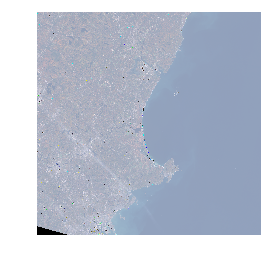

In [14]:
plt.imshow(stretch_image(landsat_tc_array))
plt.axis('off')

(-0.5, 3662.5, 3659.5, -0.5)

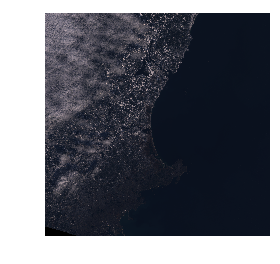

In [101]:
landsat_tc_array_2 = gen_rgb_array(landsat_files_2[2::-1])
# scipy.misc.imsave('./figures/landsat_toa_tc_2.tif', stretch_image(landsat_tc_array_2))
scipy.misc.toimage(landsat_tc_array_2, cmin=0, cmax=1e4).save('./figures/landsat_toa_tc_2.tif')
plt.imshow(stretch_image(landsat_tc_array_2))
plt.axis('off')

In [104]:
sentinel_tc_array = gen_rgb_array(sentinel_files[2::-1])

In [105]:
# scipy.misc.imsave('./figures/sentinel_toa_tc.tif', stretch_image(sentinel_tc_array))
scipy.misc.toimage(sentinel_tc_array, cmin=0, cmax=1e4).save('./figures/sentinel_toa_tc.tif')

(-0.5, 10979.5, 10979.5, -0.5)

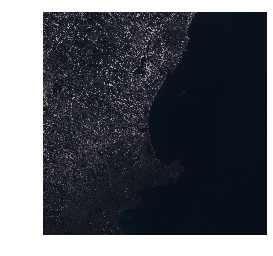

In [18]:
plt.imshow(stretch_image(sentinel_tc_array))
plt.axis('off')

# Compare the histograms of Landsat and Sentinel images
## TOA

In [29]:
def read_single_band(fn, bnum=1):
    ds = gdal.Open(fn)
    band = ds.GetRasterBand(bnum)
    return band.ReadAsArray()

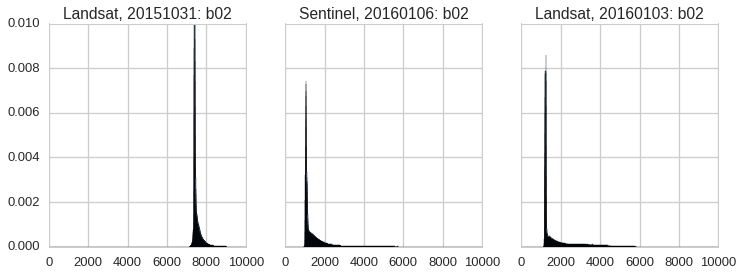

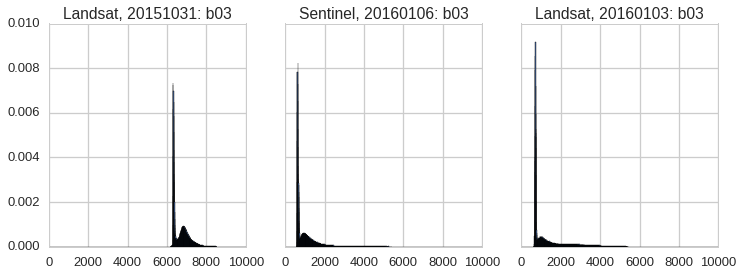

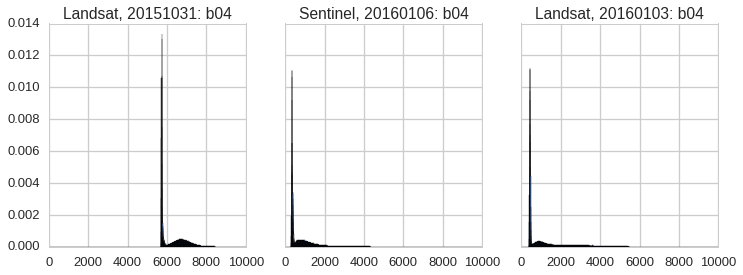

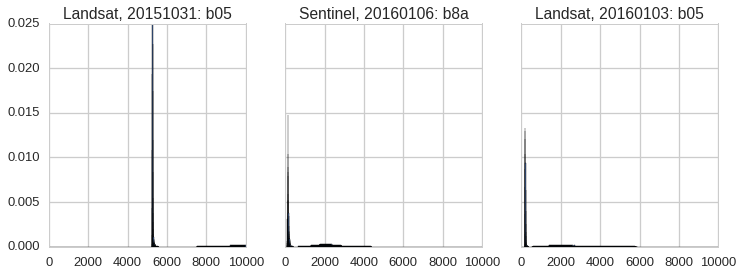

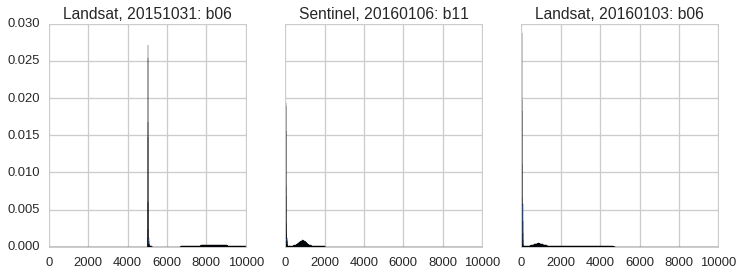

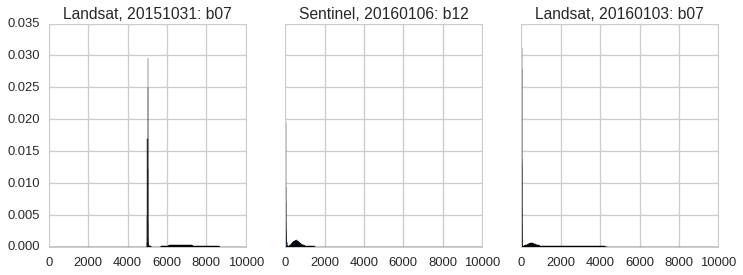

In [18]:
landsat_bname = ['b02', 'b03', 'b04', 'b05', 'b06', 'b07']
sentinel_bname = ['b02', 'b03', 'b04', 'b8a', 'b11', 'b12']
for i, (oli_fn, msi_fn, oli_fn_2) in enumerate(zip(landsat_files, sentinel_files, landsat_files_2)):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)
    ax1.hist(read_single_band(oli_fn).ravel(), bins=np.arange(0, 1e4, 5), normed=True)
    ax1.set_title("Landsat, 20151031: {0:s}".format(landsat_bname[i]))
    ax2.hist(read_single_band(msi_fn).ravel(), bins=np.arange(0, 1e4, 5), normed=True)
    ax2.set_title("Sentinel, 20160106: {0:s}".format(sentinel_bname[i]))
    ax3.hist(read_single_band(oli_fn_2).ravel(), bins=np.arange(0, 1e4, 5), normed=True)
    ax3.set_title("Landsat, 20160103: {0:s}".format(landsat_bname[i]))
    plt.savefig('{0:s}/landsat_vs_sentinel_toa_{1:d}.png'.format(outfigdir, i), \
                dpi=dpi, bbox_inches='tight', pad_inches=0.)

## SR

In [57]:
landsat_sr_files = [ \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_sr_band2_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_sr_band3_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_sr_band4_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_sr_band5_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_sr_band6_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/LC80120302015304LGN00/LC80120302015304LGN00_sr_band7_T19TCH_subset.tif' \
                   ]

sentinel_sr_files = [ \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l2a/S2A_USER_PRD_MSIL2A_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_B02_20m.jp2.bin', \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l2a/S2A_USER_PRD_MSIL2A_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_B03_20m.jp2.bin', \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l2a/S2A_USER_PRD_MSIL2A_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_B04_20m.jp2.bin', \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l2a/S2A_USER_PRD_MSIL2A_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_B8A_20m.jp2.bin', \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l2a/S2A_USER_PRD_MSIL2A_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_B11_20m.jp2.bin', \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/l2a/S2A_USER_PRD_MSIL2A_PDMC_20160107T014224_R111_V20160106T154314_20160106T154314.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_N02.01/IMG_DATA/R20m/S2A_USER_MSI_L2A_TL_MTI__20160106T203715_A002825_T19TCH_B12_20m.jp2.bin' \
                    ]

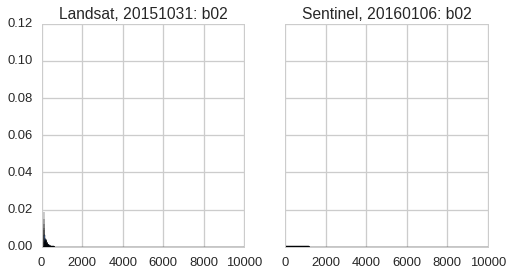

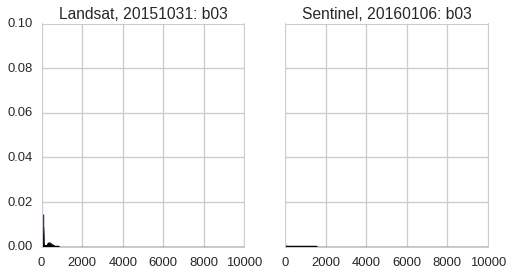

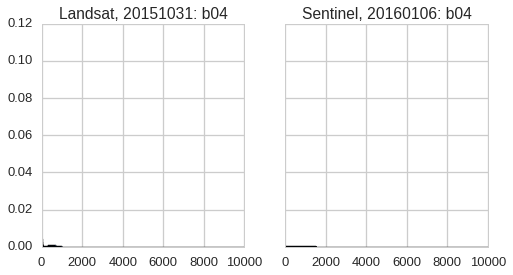

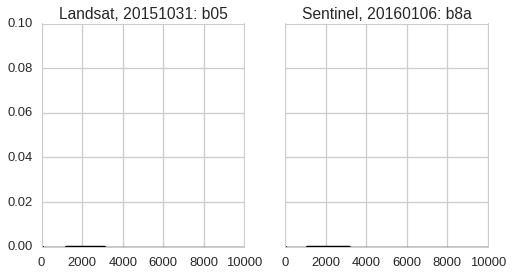

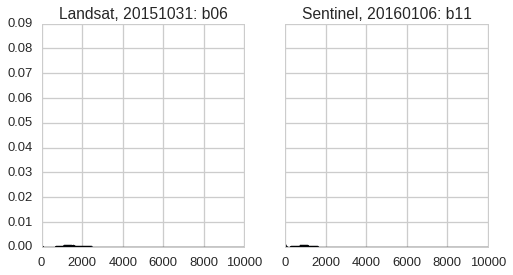

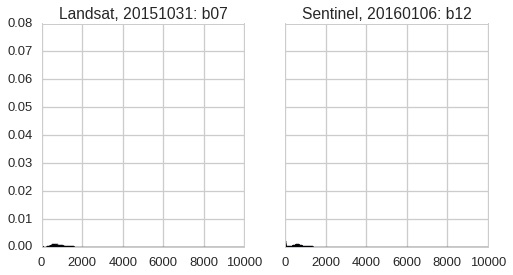

In [21]:
landsat_bname = ['b02', 'b03', 'b04', 'b05', 'b06', 'b07']
sentinel_bname = ['b02', 'b03', 'b04', 'b8a', 'b11', 'b12']
for i, (oli_fn, msi_fn) in enumerate(zip(landsat_sr_files, sentinel_sr_files)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True, sharex=True)
    ax1.hist(read_single_band(oli_fn).ravel(), bins=np.arange(0, 1e4, 5), normed=True)
    ax1.set_title("Landsat, 20151031: {0:s}".format(landsat_bname[i]))
    ax2.hist(read_single_band(msi_fn).ravel(), bins=np.arange(0, 1e4, 5), normed=True)
    ax2.set_title("Sentinel, 20160106: {0:s}".format(sentinel_bname[i]))
    plt.savefig('{0:s}/landsat_vs_sentinel_sr_{1:d}.png'.format(outfigdir, i), \
                dpi=dpi, bbox_inches='tight', pad_inches=0.)

(-0.5, 3662.5, 3659.5, -0.5)

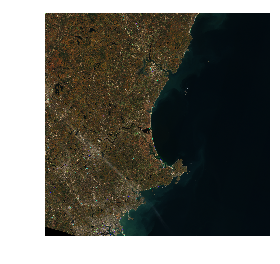

In [97]:
landsat_sr_tc_array = gen_rgb_array(landsat_sr_files[2::-1])
# scipy.misc.imsave('./figures/landsat_sr_tc.tif', stretch_image(landsat_sr_tc_array, 0, 1000)*255)
scipy.misc.toimage(landsat_sr_tc_array, cmin=0, cmax=2e3).save('./figures/landsat_sr_tc.tif')
plt.imshow(stretch_image(landsat_sr_tc_array, 0, 2000))
plt.axis('off')
# plt.savefig('{0:s}/landsat_sr_tc.tif'.format(outfigdir), dpi=dpi, bbox_inches='tight', pad_inches=0.)

(-0.5, 5489.5, 5489.5, -0.5)

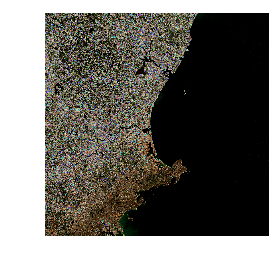

In [96]:
sentinel_sr_tc_array = gen_rgb_array(sentinel_sr_files[2::-1])
# scipy.misc.imsave('./figures/sentinel_sr_tc.tif', stretch_image(sentinel_sr_tc_array, 0, 1000)*255)
scipy.misc.toimage(sentinel_sr_tc_array, cmin=0, cmax=2e3).save('./figures/sentinel_sr_tc.tif')
plt.imshow(stretch_image(sentinel_sr_tc_array, 0, 2000))
plt.axis('off')

## Albedo

In [30]:
landsat_albedo_files = [ \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/landsat-8-albedo/LC80120302015304LGN00/lndAlbedo_P012R030_2015-304_bsa_T19TCH_subset.tif', \
'/neponset/nbdata06/albedo/zhan.li/landsat-8/landsat-8-albedo/LC80120302015304LGN00/lndAlbedo_P012R030_2015-304_wsa_T19TCH_subset.tif' \
                       ]
sentinel_albedo_files = [ \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/albedo/S2A_USER_MTD_L2A_TL_MTI__20160106T203715_A002825_T19TCH/lndAlbedo_S2A_USER_MTD_L2A_TL_MTI__20160106T203715_A002825_T19TCH.bin', \
'/neponset/nbdata06/albedo/zhan.li/sentinel-2/albedo/S2A_USER_MTD_L2A_TL_MTI__20160106T203715_A002825_T19TCH/lndAlbedo_S2A_USER_MTD_L2A_TL_MTI__20160106T203715_A002825_T19TCH.bin' \
                        ]

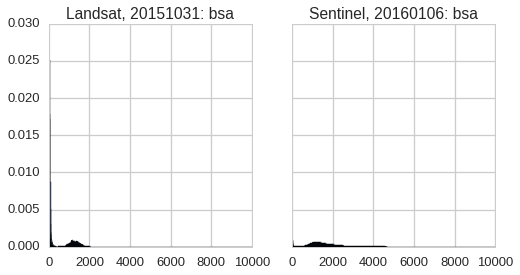

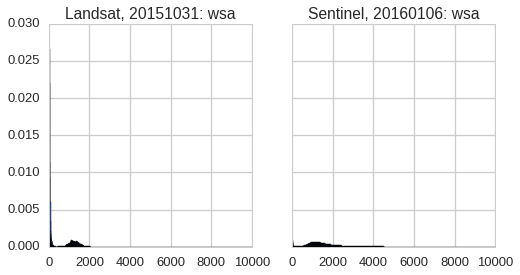

In [31]:
landsat_bname = ['bsa', 'wsa']
sentinel_bname = ['bsa', 'wsa']
for i, (oli_fn, msi_fn) in enumerate(zip(landsat_albedo_files, sentinel_albedo_files)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True, sharex=True)
    ax1.hist(read_single_band(oli_fn).ravel(), bins=np.arange(0, 1e4, 5), normed=True)
    ax1.set_title("Landsat, 20151031: {0:s}".format(landsat_bname[i]))
    ax2.hist(read_single_band(msi_fn, bnum=i+1).ravel(), bins=np.arange(0, 1e4, 5), normed=True)
    ax2.set_title("Sentinel, 20160106: {0:s}".format(sentinel_bname[i]))
    plt.savefig('{0:s}/landsat_vs_sentinel_albedo_{1:d}.png'.format(outfigdir, i), \
                dpi=dpi, bbox_inches='tight', pad_inches=0.)

(-0.5, 3662.5, 3659.5, -0.5)

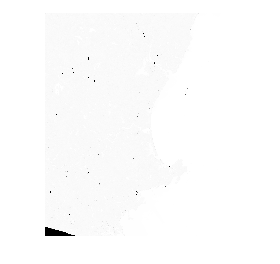

In [98]:
img_array = read_single_band(landsat_albedo_files[0])
# scipy.misc.imsave('./figures/landsat_bsa.tif', stretch_image(img_array, 0, 10000)*255)
scipy.misc.toimage(img_array, cmin=0, cmax=1e4).save('./figures/landsat_bsa.tif')
plt.imshow(stretch_image(img_array, 0, 10000)*255)
plt.axis('off')

(-0.5, 3662.5, 3659.5, -0.5)

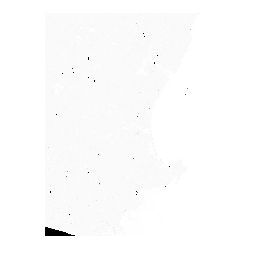

In [99]:
img_array = read_single_band(landsat_albedo_files[1])
# scipy.misc.imsave('./figures/landsat_wsa.tif', stretch_image(img_array, 0, 10000)*255)
scipy.misc.toimage(img_array, cmin=0, cmax=1e4).save('./figures/landsat_wsa.tif')
plt.imshow(stretch_image(img_array, 0, 10000))
plt.axis('off')

(-0.5, 5489.5, 5489.5, -0.5)

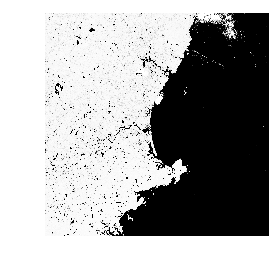

In [89]:
img_array = read_single_band(sentinel_albedo_files[0], bnum=1)
# scipy.misc.imsave('./figures/sentinel_bsa.tif', stretch_image(img_array))
scipy.misc.toimage(img_array, cmin=0, cmax=1e4).save('./figures/sentinel_bsa.tif')
plt.imshow(stretch_image(img_array, 0, 10000)*255)
plt.axis('off')

(-0.5, 5489.5, 5489.5, -0.5)

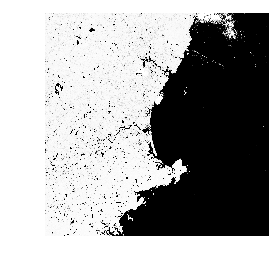

In [88]:
img_array = read_single_band(sentinel_albedo_files[0], bnum=2)
# scipy.misc.imsave('./figures/sentinel_wsa.tif', stretch_image(img_array))
scipy.misc.toimage(img_array, cmin=0, cmax=1e4).save('./figures/sentinel_wsa.tif')
plt.imshow(stretch_image(img_array, 0, 10000)*255)
plt.axis('off')